In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,14036.599609,16461.199219,14028.900391,16099.799805,16099.799805,13454300160
1,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,15838.500000,12487600128
2,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,14606.500000,12336499712
3,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,14656.200195,13025500160
4,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195,12952.200195,14452599808
...,...,...,...,...,...,...,...
1822,2022-12-22,16818.380859,16866.673828,16592.408203,16830.341797,16830.341797,16441573050
1823,2022-12-23,16829.644531,16905.218750,16794.458984,16796.953125,16796.953125,15329265213
1824,2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213
1825,2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938


In [3]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

In [4]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-26,14036.599609,16461.199219,14028.900391,16099.799805,16099.799805,13454300160
2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,15838.500000,12487600128
2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,14606.500000,12336499712
2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,14656.200195,13025500160
2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195,12952.200195,14452599808
...,...,...,...,...,...,...
2022-12-22,16818.380859,16866.673828,16592.408203,16830.341797,16830.341797,16441573050
2022-12-23,16829.644531,16905.218750,16794.458984,16796.953125,16796.953125,15329265213
2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213


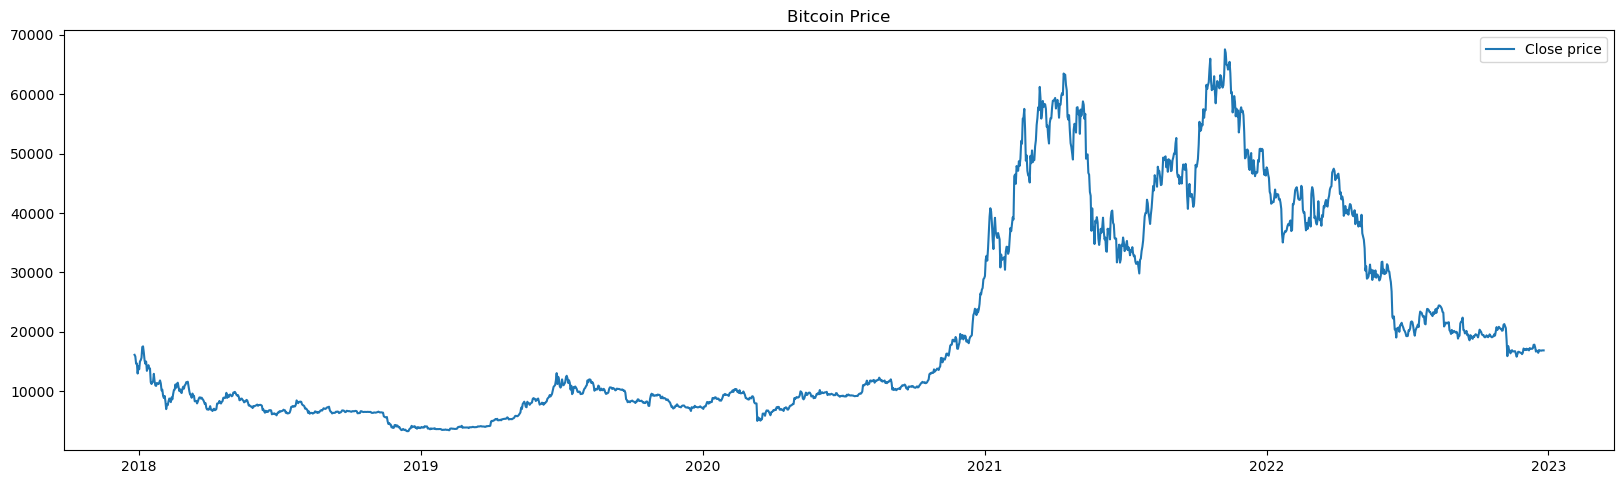

In [5]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Bitcoin Price')
plt.plot(df2.Close,label='Close price')
plt.legend()

In [6]:
n = int(len(df2)*0.9)
df_train = pd.DataFrame(df2['Close'][:n]).rename(columns={'Close':'y_train'})
df_test = pd.DataFrame(df2['Close'][n:]).rename(columns={'Close':'y_test'})

In [7]:
len(df_test)

183

In [9]:
data = list(df2["Close"])

# Check Stationarity

Method 1: Check stationary through mean and variance of time series


To check Stationary 


Before difference mean and Variance

mean1 = 7719.775117 ,mean2 = 32954.776331
var1 = 5997419.207909 ,var2 = 252575046.236962


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'histogram of time series data'}, xlabel='Close', ylabel='Density'>

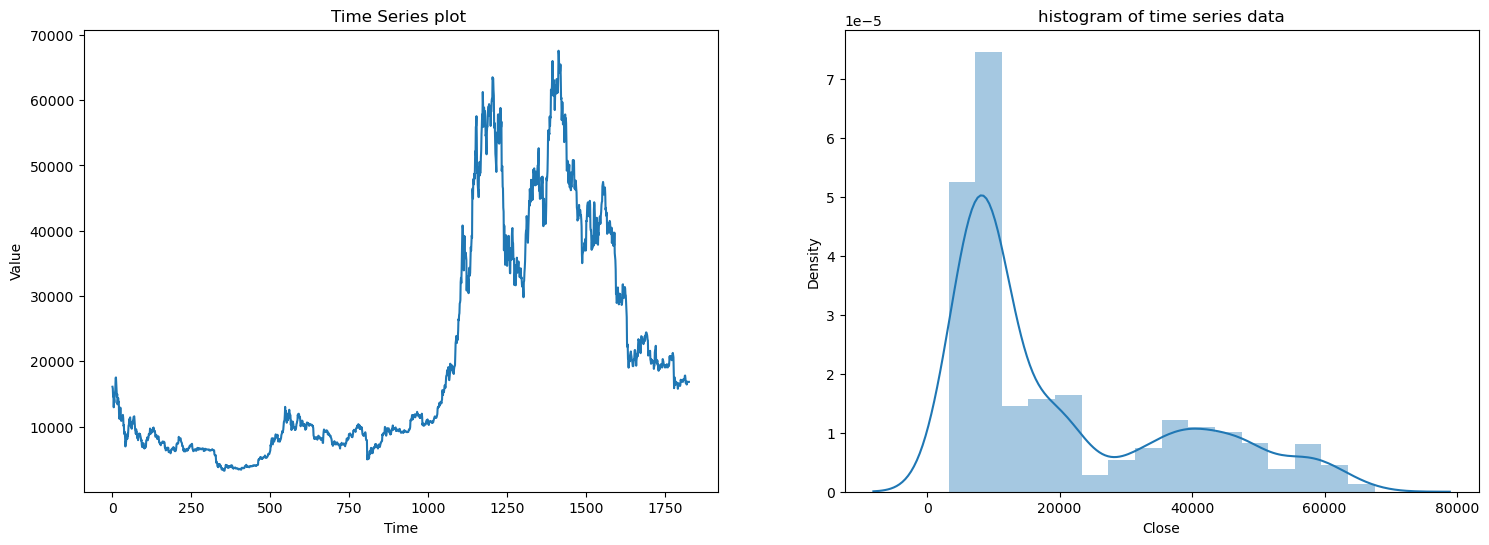

In [8]:
#taking half length of data
split = round(len(df['Close'])/2)
# split two part of time series data 
X1,X2 = df['Close'][0:split],df['Close'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(df['Close'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(df['Close'],ax =ax[1])

Method 2: ACF plot and PACF plot

ACF( autocorrection function) is the correlation of the time series with its lags, e.g, yt and yt-k for k = 1,2,...

PACF (partial autocorrelation function) is the partial correclation of the time series with its lags, after removing the effects of lower-order-lags between them.

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


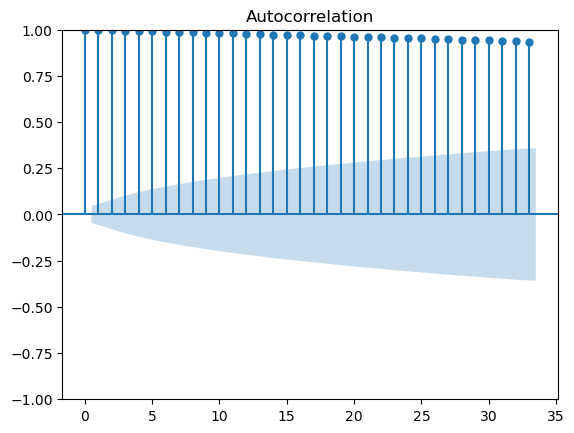

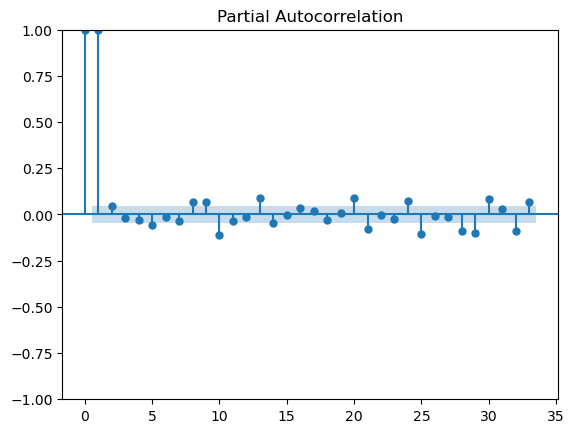

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df2['Close'])
pacf_orginal = plot_pacf(df2['Close'])

Method 3: Check Stationary thourgh ADF test

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationar

In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.369269882971864
2. P-Value :  0.5969166728785437
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression: 1802
5. Critical Values :
	 1% :  -3.4339840952648695
	 5% :  -2.8631452508003057
	 10% :  -2.567624583142913


In [12]:
!pip install pmdarima

# Make non-stationary to stationary

We have 4 method to make non-stationary to stationary

(i) taking its difference, where from each value in the time series data we subtract the previous value. In python we can do this by using df.diff() method. In some dataset taking the difference once is enough is to make it stationary. But some in cases, we need to take difference more than once.

(ii) take the log of the time series, using np.log(df)

(iii) take the square root of the time series, np.sqrt(df)

(iv) take the proportional change, by using df.shift(1)/df

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


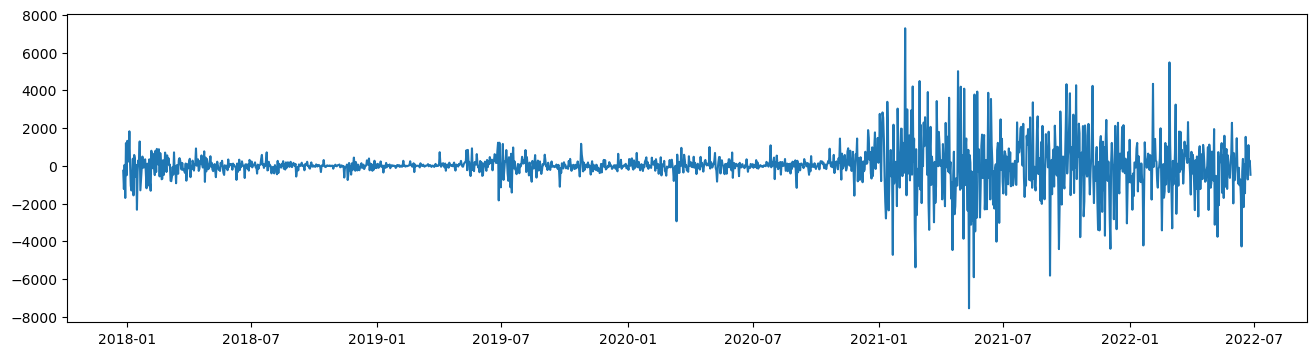

In [14]:
diff = df_train.diff().dropna()
fig = plt.subplots(figsize=(16,4))
plt.plot(diff)

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


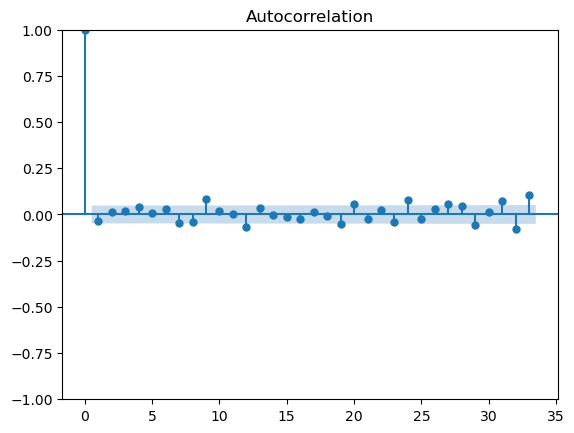

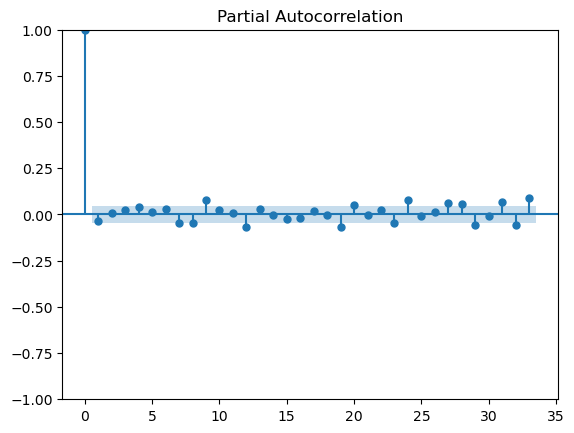

In [15]:
acf_diff = plot_acf(diff)
pacf_diff= plot_pacf(diff) 

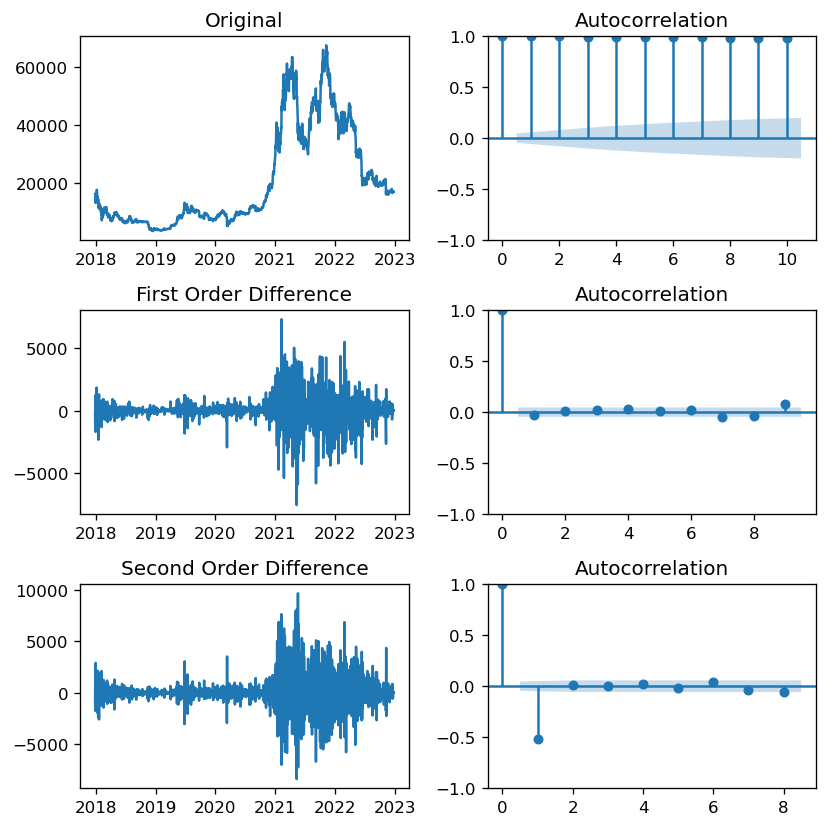

In [80]:
#Non-seasonal part
def auto_correlation(df2, prefix, lags):
    plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})
    
    # Define the plot grid
    fig, axes = plt.subplots(3,2, sharex=False)

    # First Difference
    axes[0, 0].plot(df2)
    axes[0, 0].set_title('Original' + prefix)
    plot_acf(df2, lags=lags, ax=axes[0, 1])

    # First Difference
    df_first_diff = df2.diff().dropna()
    axes[1, 0].plot(df_first_diff)
    axes[1, 0].set_title('First Order Difference' + prefix)
    plot_acf(df_first_diff, lags=lags - 1, ax=axes[1, 1])

    # Second Difference
    df_second_diff = df2.diff().diff().dropna()
    axes[2, 0].plot(df_second_diff)
    axes[2, 0].set_title('Second Order Difference' + prefix)
    plot_acf(df_second_diff, lags=lags - 2, ax=axes[2, 1])
    plt.tight_layout()
    plt.show()
    
auto_correlation(df2['Close'], '', 10)

In [16]:
from statsmodels.tsa.stattools import adfuller 

result = adfuller(diff) 
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -7.775943868635514
2. P-Value :  8.669145007031113e-12
3. Critical Values :
	 1% :  -3.434395520959224
	 5% :  -2.8633268625511046
	 10% :  -2.5677212878453477


Find d value by using ndiffs 

In [17]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


# Determine ARIMA models parameter d, p,q with auto - arima 

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pmdarima as pm

In [19]:
# auto_arima
model_fit = pm.auto_arima(df_train, test='adf', 
                         max_p=5, max_d=2, max_q=5, 
                         seasonal=False, m=12,
                         max_P=5, max_D=5, max_Q=5,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

Performing stepwise search to minimize aic


D:\Anaconda\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27505.897, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27512.953, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27512.916, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27512.938, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27510.967, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27515.522, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27516.889, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=27508.076, Time=2.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=27507.858, Time=2.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27514.913, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27516.431, Time=0.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27516.595, Time=0.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=27509.906, Time=1.41 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=27503.842, Time=1.21 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=27513.193, Time=0.32

In [20]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,1,2))

In [21]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1827
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -15213.908
Date:                Tue, 03 Jan 2023   AIC                          30437.815
Time:                        12:27:11   BIC                          30465.365
Sample:                             0   HQIC                         30447.977
                               - 1827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8172      0.023     35.962      0.000       0.773       0.862
ar.L2         -0.9314      0.020    -46.860      0.000      -0.970      -0.892
ma.L1         -0.8497      0.022    -38.146      0.000      -0.893      -0.806
ma.L2          0.9430      0.019     49.994      0.000       0.906       0.980
sigma2      1.017e+06   1.45e+04     69.880      0.000    9.88e+05    1.05e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              6767.95
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              13.38   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
pred = model.predict(start=start,end=end)
pred

array([20944.62720146, 20651.83604037, 20298.89042718, 20198.85382289,
       19856.39993806, 19253.86087995, 19156.38213345, 19236.63725411,
       20231.19801986, 20259.24999123, 20594.94622241, 21580.87881496,
       21648.52236758, 21581.09879302, 20951.03441605, 20078.38049327,
       19340.75584722, 20088.36095275, 20447.62932548, 20844.59052391,
       21304.26157465, 20885.82661703, 22408.55265421, 23213.98037376,
       23171.01496133, 23278.83208111, 22883.08765226, 22503.49964427,
       22475.38152477, 21254.33695079, 21264.13807369, 22996.20929334,
       23866.69317329, 23773.98668813, 23613.02265308, 23337.74116147,
       23352.6637654 , 23020.64925519, 22846.7406102 , 22596.51459591,
       23235.95301861, 22966.71884556, 23220.05167712, 23823.80857387,
       23163.1528881 , 23900.21933506, 23927.11858705, 24407.3586281 ,
       24461.08991711, 24350.15635696, 24132.95344122, 23856.92545221,
       23332.20156044, 23232.01327378, 20971.87850983, 21191.52007365,
      

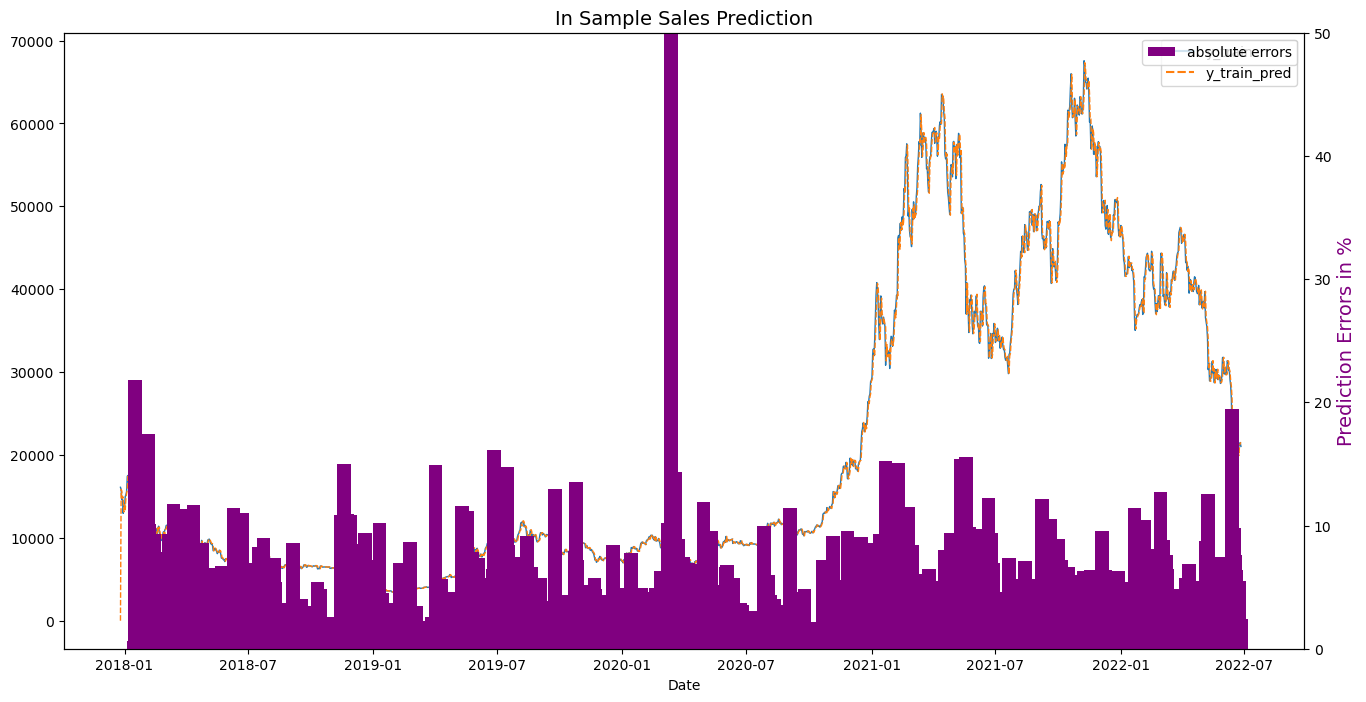

In [23]:
# Generate in-sample Predictions
# The parameter dynamic=False means that the model makes predictions upon the lagged values.
# This means that the model is trained until a point in the time-series and then tries to predict the next value.
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_train['y_train_pred'] = pred

# Calculate the percentage difference
df_train['diff_percent'] = abs((df_train['y_train'] - pred) / df_train['y_train'])* 100

# Print the predicted time-series
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("In Sample Sales Prediction", fontsize=14)
sns.lineplot(data=df_train[['y_train', 'y_train_pred']], linewidth=1.0)

# Print percentage prediction errors on a separate axis (ax2)
ax2 = ax1.twinx() 
ax2.set_ylabel('Prediction Errors in %', color='purple', fontsize=14)  
ax2.set_ylim([0, 50])
ax2.bar(height=df_train['diff_percent'][20:], x=df_train.index[20:], width=20, color='purple', label='absolute errors')
plt.legend()
plt.show()

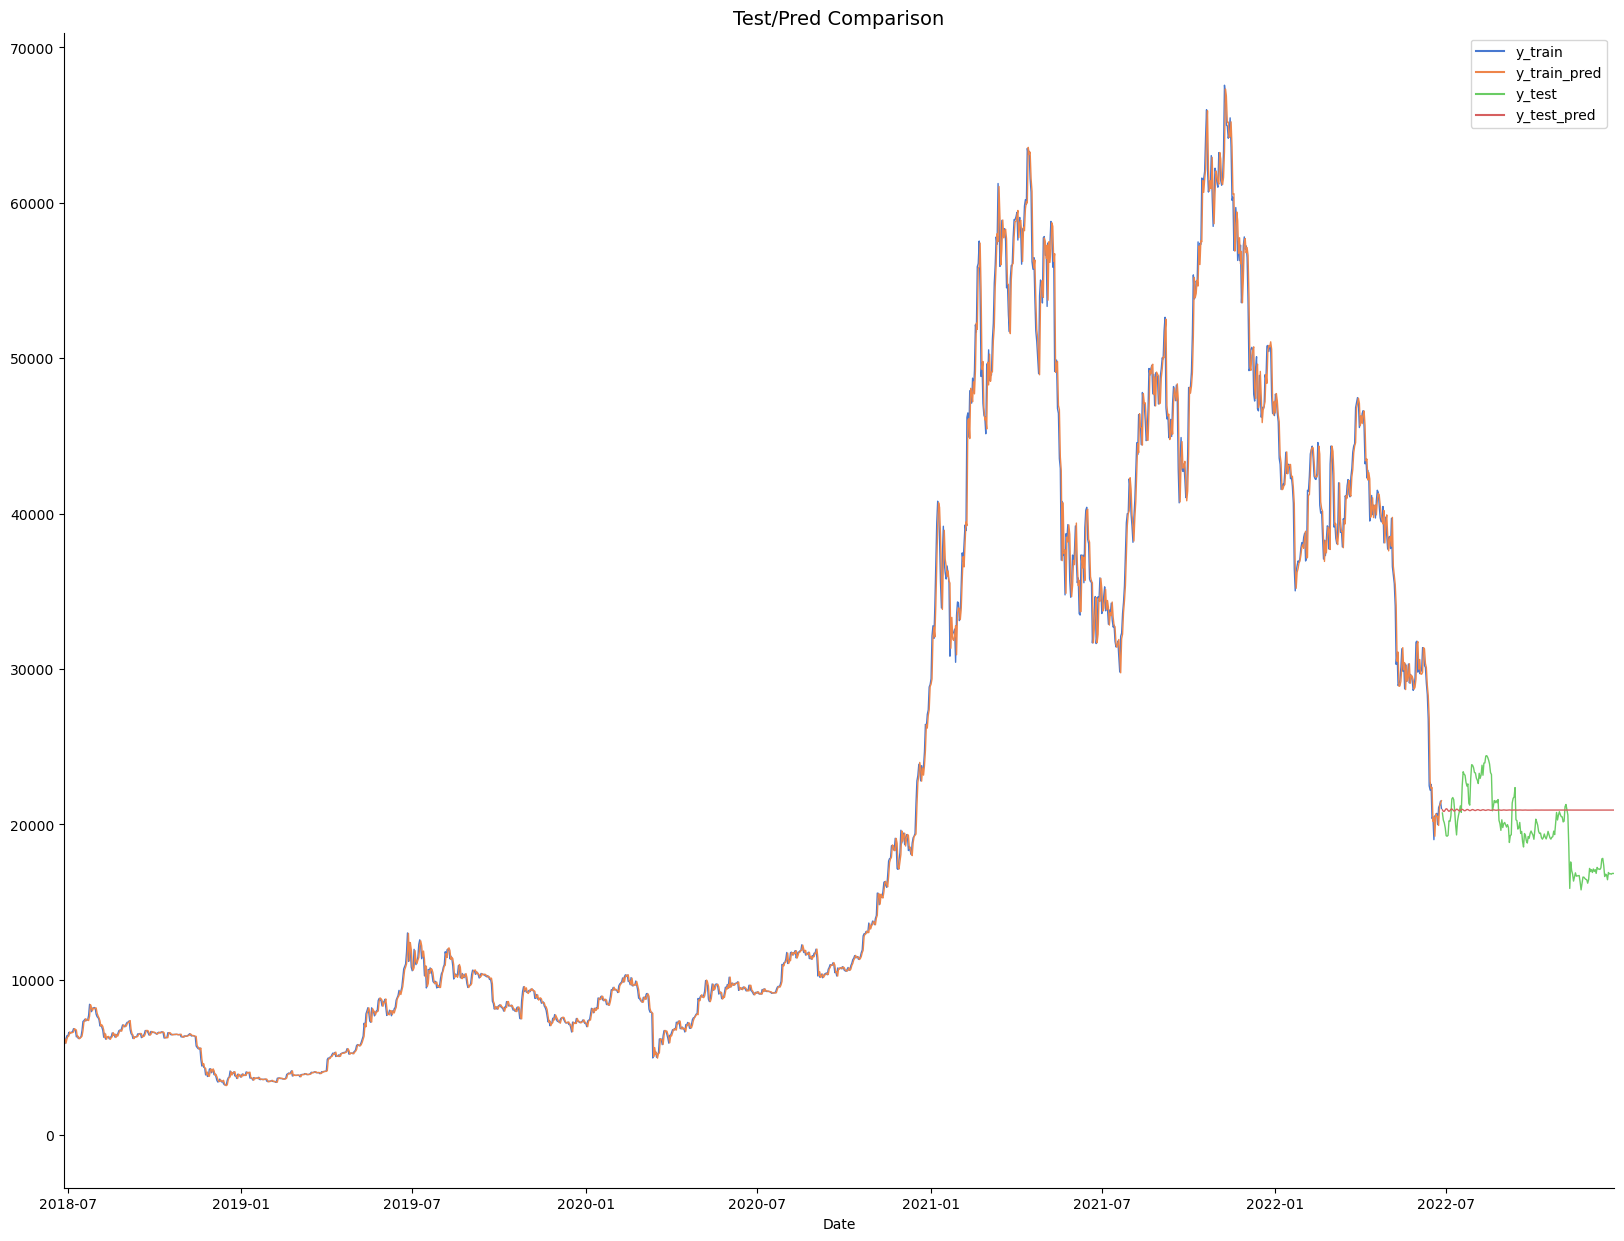

In [24]:
# Generate prediction for n periods, 
# Predictions start from the last date of the training data
test_pred = model_fit.predict(n_periods=183, dynamic=False)
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])
df_union.rename(columns={'Close':'y_test'}, inplace=True)

# Print the predicted time-series
fig, ax = plt.subplots(figsize=(20, 15))
plt.title("Test/Pred Comparison", fontsize=14)
sns.despine();
sns.lineplot(data=df_union[['y_train', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')
ax.set_xlim([df_union.index[183],df_union.index.max()])
plt.legend()

# Measure Performance

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [28]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [29]:
# Mean Absolute Percentage Error (MAPE)
mae = mae(df_test['y_test'], df_test['y_test_pred'])*100
print(f'MAE: {np.round(mae, 2)} %')

# Median Absolute Percentage Error (MDAPE)
mape = mape(df_test['y_test'], df_test['y_test_pred'])*100
print(f'MAPE: {np.round(mape, 2)} %')

RMSE = np.sqrt(mean_squared_error(df_test['y_test'], df_test['y_test_pred']))
print(f'RMSE: {np.round(RMSE, 2)} %')

MAE: 208446.55 %
MAPE: 11.22 %
RMSE: 2522.73 %


In [44]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([16804.14260918, 16817.19819768, 16827.13987608, 16864.69426641,
       16886.12573931, 16868.66366431, 16834.43266232, 16822.72136495,
       16845.03183551, 16874.17214205, 16877.2075514 , 16852.54811017,
       16829.56850889, 16833.75557499, 16858.5796449 , 16874.96706997,
       16865.23932172, 16842.02689691, 16832.11692718, 16845.63725542,
       16865.91627203, 16869.89670647, 16854.26261316, 16837.77868001,
       16838.86839248, 16855.11140015, 16867.37083291, 16862.26159523,
       16846.66821875, 16838.68330739, 16846.68079164])

In [47]:
import datetime
start_date = datetime.datetime(2022,12,26)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [48]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-26    16804.142609
2022-12-27    16817.198198
2022-12-28    16827.139876
2022-12-29    16864.694266
2022-12-30    16886.125739
2022-12-31    16868.663664
2023-01-01    16834.432662
2023-01-02    16822.721365
2023-01-03    16845.031836
2023-01-04    16874.172142
2023-01-05    16877.207551
2023-01-06    16852.548110
2023-01-07    16829.568509
2023-01-08    16833.755575
2023-01-09    16858.579645
2023-01-10    16874.967070
2023-01-11    16865.239322
2023-01-12    16842.026897
2023-01-13    16832.116927
2023-01-14    16845.637255
2023-01-15    16865.916272
2023-01-16    16869.896706
2023-01-17    16854.262613
2023-01-18    16837.778680
2023-01-19    16838.868392
2023-01-20    16855.111400
2023-01-21    16867.370833
2023-01-22    16862.261595
2023-01-23    16846.668219
2023-01-24    16838.683307
2023-01-25    16846.680792
dtype: float64

<AxesSubplot:xlabel='Date'>

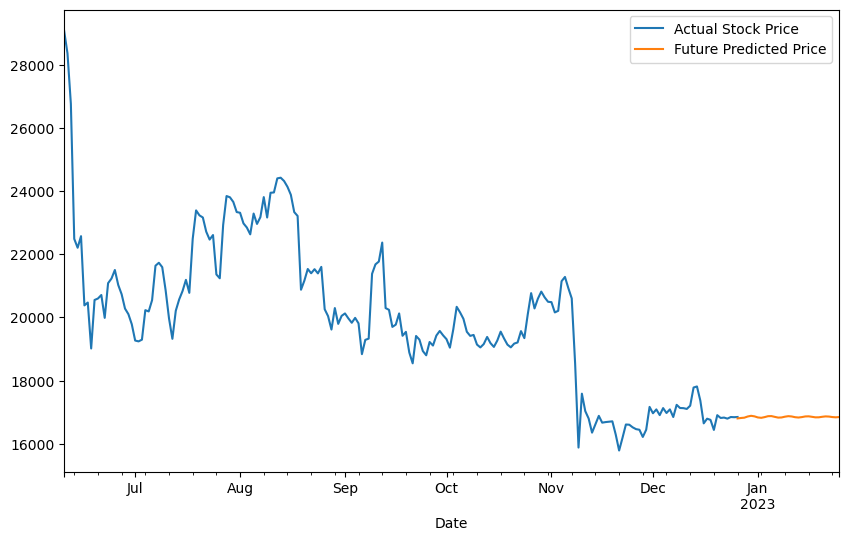

In [49]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [40]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([9324.5568847 , 8938.99869519, 8939.48512105, 8966.04545473,
       8930.97325532, 8950.61152759, 8932.27940071, 8935.71579683,
       8933.5573441 , 8934.03971688, 8927.52005423, 8927.03323784,
       8923.83537746, 8922.24198206, 8919.68563957, 8917.50879939,
       8914.75337425, 8912.64060581, 8910.27171866, 8907.98396668,
       8905.57994863, 8903.25034306, 8900.88106702, 8898.56604057,
       8896.2177245 , 8893.87377922, 8891.52170866, 8889.18129741,
       8886.83665737, 8884.49488442, 8882.14929725])

In [41]:
import datetime
start_date = datetime.datetime(2022,12,5)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [42]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-05    9324.556885
2022-12-06    8938.998695
2022-12-07    8939.485121
2022-12-08    8966.045455
2022-12-09    8930.973255
2022-12-10    8950.611528
2022-12-11    8932.279401
2022-12-12    8935.715797
2022-12-13    8933.557344
2022-12-14    8934.039717
2022-12-15    8927.520054
2022-12-16    8927.033238
2022-12-17    8923.835377
2022-12-18    8922.241982
2022-12-19    8919.685640
2022-12-20    8917.508799
2022-12-21    8914.753374
2022-12-22    8912.640606
2022-12-23    8910.271719
2022-12-24    8907.983967
2022-12-25    8905.579949
2022-12-26    8903.250343
2022-12-27    8900.881067
2022-12-28    8898.566041
2022-12-29    8896.217724
2022-12-30    8893.873779
2022-12-31    8891.521709
2023-01-01    8889.181297
2023-01-02    8886.836657
2023-01-03    8884.494884
2023-01-04    8882.149297
dtype: float64

<AxesSubplot:xlabel='Date'>

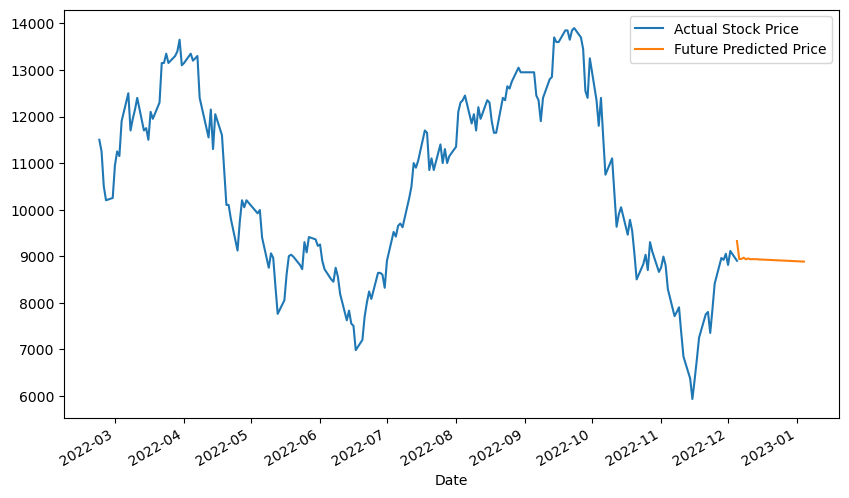

In [43]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [44]:
pred_future = model.predict(start=end,end=end+60)
pred_future

array([9324.5568847 , 8938.99869519, 8939.48512105, 8966.04545473,
       8930.97325532, 8950.61152759, 8932.27940071, 8935.71579683,
       8933.5573441 , 8934.03971688, 8927.52005423, 8927.03323784,
       8923.83537746, 8922.24198206, 8919.68563957, 8917.50879939,
       8914.75337425, 8912.64060581, 8910.27171866, 8907.98396668,
       8905.57994863, 8903.25034306, 8900.88106702, 8898.56604057,
       8896.2177245 , 8893.87377922, 8891.52170866, 8889.18129741,
       8886.83665737, 8884.49488442, 8882.14929725, 8879.8048323 ,
       8877.46019607, 8875.11673721, 8872.77252228, 8870.42838431,
       8868.08398677, 8865.7398391 , 8863.39568131, 8861.05157793,
       8858.7073665 , 8856.36317427, 8854.01898245, 8851.67482054,
       8849.33064676, 8846.9864708 , 8844.64228623, 8842.29810797,
       8839.9539311 , 8837.60975551, 8835.26557725, 8832.92139892,
       8830.57722058, 8828.23304317, 8825.88886563, 8823.54468794,
       8821.20050997, 8818.85633214, 8816.51215439, 8814.16797

In [45]:
import datetime
start_date = datetime.datetime(2022,12,5)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(61)]

In [46]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-05    9324.556885
2022-12-06    8938.998695
2022-12-07    8939.485121
2022-12-08    8966.045455
2022-12-09    8930.973255
                 ...     
2023-01-30    8821.200510
2023-01-31    8818.856332
2023-02-01    8816.512154
2023-02-02    8814.167977
2023-02-03    8811.823799
Length: 61, dtype: float64

<AxesSubplot:xlabel='Date'>

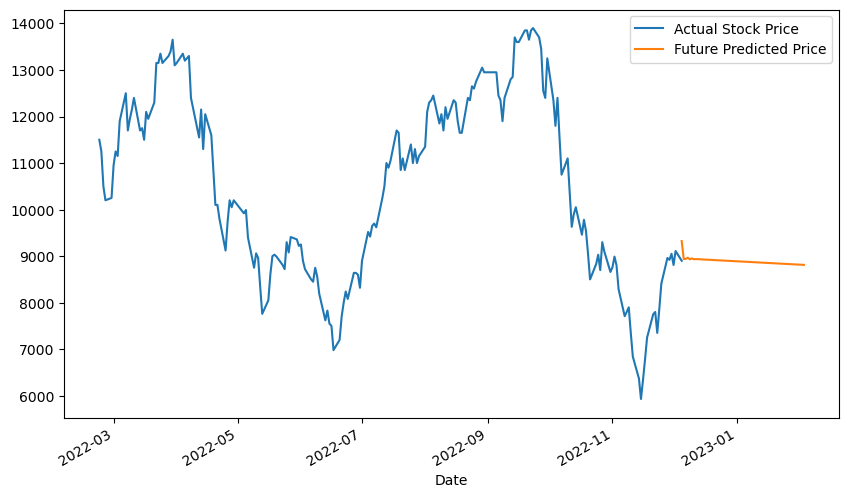

In [47]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [48]:
pred_future = model.predict(start=end,end=end+120)
pred_future

array([9324.5568847 , 8938.99869519, 8939.48512105, 8966.04545473,
       8930.97325532, 8950.61152759, 8932.27940071, 8935.71579683,
       8933.5573441 , 8934.03971688, 8927.52005423, 8927.03323784,
       8923.83537746, 8922.24198206, 8919.68563957, 8917.50879939,
       8914.75337425, 8912.64060581, 8910.27171866, 8907.98396668,
       8905.57994863, 8903.25034306, 8900.88106702, 8898.56604057,
       8896.2177245 , 8893.87377922, 8891.52170866, 8889.18129741,
       8886.83665737, 8884.49488442, 8882.14929725, 8879.8048323 ,
       8877.46019607, 8875.11673721, 8872.77252228, 8870.42838431,
       8868.08398677, 8865.7398391 , 8863.39568131, 8861.05157793,
       8858.7073665 , 8856.36317427, 8854.01898245, 8851.67482054,
       8849.33064676, 8846.9864708 , 8844.64228623, 8842.29810797,
       8839.9539311 , 8837.60975551, 8835.26557725, 8832.92139892,
       8830.57722058, 8828.23304317, 8825.88886563, 8823.54468794,
       8821.20050997, 8818.85633214, 8816.51215439, 8814.16797

In [49]:
import datetime
start_date = datetime.datetime(2022,12,5)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(121)]

In [50]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-05    9324.556885
2022-12-06    8938.998695
2022-12-07    8939.485121
2022-12-08    8966.045455
2022-12-09    8930.973255
                 ...     
2023-03-31    8680.549843
2023-04-01    8678.205666
2023-04-02    8675.861488
2023-04-03    8673.517310
2023-04-04    8671.173132
Length: 121, dtype: float64

<AxesSubplot:xlabel='Date'>

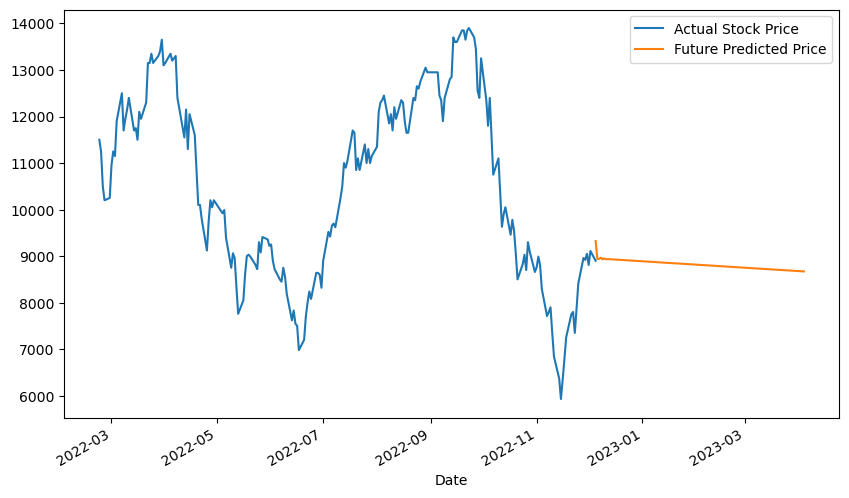

In [51]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)